# 왜 우리 동네에는 스타벅스가 없을까?

## 1. 데이터 수집

### 1.1 크롤링을 이용한 서울시 스타벅스 매장 목록 데이터 생성

In [18]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
url = 'https://www.starbucks.co.kr/store/store_map.do?disp=locale'
browser = webdriver.Chrome('C:\\chromedriver_win32\\chromedriver.exe')
browser.get(url)

* html에서 F12를 누른 뒤 
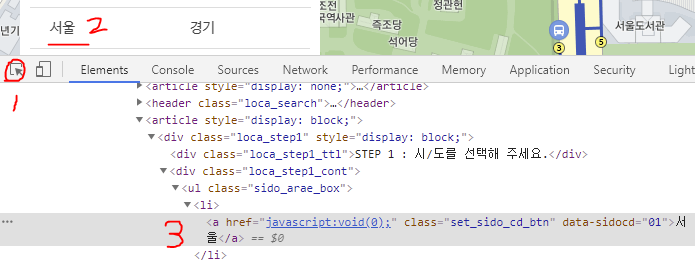
* 1번 선택 후 2번 클릭
* 3번에서 마우스 오른쪽 클릭 -> Copy -> Copy selector 눌러 경로를 가져 온다.

In [20]:
# find_element_by_css_selector().click() 
# 경로를 클릭하도록 명령

seoul_btn = '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
browser.find_element_by_css_selector(seoul_btn).click()

In [21]:
all_btn = '#mCSB_2_container > ul > li:nth-child(1) > a'
browser.find_element_by_css_selector(all_btn).click()

In [22]:
# .page_source
# 해당 요소의 HTML 소스를 가져온다
html = browser.page_source  
bs = BeautifulSoup(html,'html.parser')

In [16]:
bs

<html lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="website" property="og:type"/>
<meta content="Starbucks" property="og:title"/>
<meta content="https://www.starbucks.co.kr/" property="og:url"/>
<meta content="https://image.istarbucks.co.kr/common/img/kakaotalk.png" property="og:image"/>
<meta content="Starbucks" property="og:description"/>
<title id="titleJoin">Starbucks Coffee Korea</title>
<link href="https://image.istarbucks.co.kr/common/img/common/favicon.ico?v=200828" rel="shortcut icon" type="image/ico"/> <!-- 20200827 파비콘 교체 및 CDN 변수처리 -->
<link href="/common/css/reset.css" rel="stylesheet"/>
<link href="/common/css/style.css?v=200130" rel="stylesheet"/>
<link href="/common/css/jquery.bxslider.css" rel="stylesheet"/>
<link href="/common/css/idangerous.swiper.css" rel="stylesheet"/>
<link 

In [23]:
starbucks_soup_list = bs.select('li.quickResultLstCon')
starbucks_soup_list[0]

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [24]:
# 스타벅스 매장 정보 추출
starbucks_store = starbucks_soup_list[0]

name = starbucks_store.select('strong')[0].text.strip()
lat = starbucks_store['data-lat'].strip()
long = starbucks_store['data-long'].strip()
store_type = starbucks_store.select('i')[0]['class'][0][4:]
address = str(starbucks_store.select('p.result_details')[0]).split('<br/>')[0].split('>')[1]
tel = str(starbucks_store.select('p.result_details')[0]).split('<br/>')[1].split('<')[0]

print(name)
print(lat)
print(long)
print(store_type)
print(address)
print(tel)


역삼아레나빌딩
37.501087
127.043069
general
서울특별시 강남구 언주로 425 (역삼동)
1522-3232


In [25]:
# 데이터 목록 만들기
starbucks_list = []
for item in starbucks_soup_list:
    name = item.select('strong')[0].text.strip()
    lat = item['data-lat'].strip()
    long = item['data-long'].strip()
    store_type = item.select('i')[0]['class'][0][4:]
    address = str(item.select('p.result_details')[0]).split('<br/>')[0].split('>')[1]
    tel = str(item.select('p.result_details')[0]).split('<br/>')[1].split('<')[0]
    
    starbucks_list.append([name, lat, long, store_type, address, tel])
starbucks_list

[['역삼아레나빌딩',
  '37.501087',
  '127.043069',
  'general',
  '서울특별시 강남구 언주로 425 (역삼동)',
  '1522-3232'],
 ['논현역사거리',
  '37.510178',
  '127.022223',
  'general',
  '서울특별시 강남구 강남대로 538 (논현동)',
  '1522-3232'],
 ['신사역성일빌딩',
  '37.514132',
  '127.020563',
  'general',
  '서울특별시 강남구 강남대로 584 (논현동)',
  '1522-3232'],
 ['국기원사거리',
  '37.499517',
  '127.031495',
  'general',
  '서울특별시 강남구 테헤란로 125 (역삼동)',
  '1522-3232'],
 ['스탈릿대치R',
  '37.494668',
  '127.062583',
  'reserve',
  '서울특별시 강남구 남부순환로 2947 (대치동)',
  '1522-3232'],
 ['봉은사역',
  '37.515000',
  '127.063196',
  'general',
  '서울특별시 강남구 봉은사로 619 (삼성동)',
  '1522-3232'],
 ['압구정윤성빌딩',
  '37.5227934',
  '127.0286009',
  'general',
  '서울특별시 강남구 논현로 834 (신사동)',
  '1522-3232'],
 ['코엑스별마당',
  '37.510150',
  '127.060275',
  'general',
  '서울특별시 강남구 영동대로 513 (삼성동)',
  '1522-3232'],
 ['삼성역섬유센터R',
  '37.507750',
  '127.060651',
  'reserve',
  '서울특별시 강남구 테헤란로 518 (대치동)',
  '1522-3232'],
 ['압구정R',
  '37.5273669',
  '127.033061',
  'reserve',
  '서울특별시 강남구 언주로 861 (

In [26]:
# 데이터 프레임 생성
seoul_starbucks_df = pd.DataFrame(starbucks_list, columns = ['매장명','위도','경도','매장타입','주소','전화번호'])
seoul_starbucks_df.head()

매장명         위도          경도     매장타입                          주소  \
0  역삼아레나빌딩  37.501087  127.043069  general     서울특별시 강남구 언주로 425 (역삼동)   
1   논현역사거리  37.510178  127.022223  general    서울특별시 강남구 강남대로 538 (논현동)   
2  신사역성일빌딩  37.514132  127.020563  general    서울특별시 강남구 강남대로 584 (논현동)   
3   국기원사거리  37.499517  127.031495  general    서울특별시 강남구 테헤란로 125 (역삼동)   
4   스탈릿대치R  37.494668  127.062583  reserve  서울특별시 강남구 남부순환로 2947 (대치동)   

        전화번호  
0  1522-3232  
1  1522-3232  
2  1522-3232  
3  1522-3232  
4  1522-3232

In [27]:
# 데이터 프레임의 정보 확인
seoul_starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     545 non-null    object
 1   위도      545 non-null    object
 2   경도      545 non-null    object
 3   매장타입    545 non-null    object
 4   주소      545 non-null    object
 5   전화번호    545 non-null    object
dtypes: object(6)
memory usage: 25.7+ KB


In [28]:
# 엑셀로 저장
# index : bool, default True
# 인덱스 필요 없는 경우 False 
seoul_starbucks_df.to_excel('./StarbucksData/seoul_starbucks_list.xlsx', index=False)

### 1.2 서울열린데이터광장 데이터 수집

* 서울시 주민등록인구(구별) 통계 데이터 다운로드<br>
https://data.seoul.go.kr/dataList/104/S/2/datasetView.do<br><br>
* 서울시 사업체현황 (산업대분류별/동별) 통계 데이터 직접 다운로드
https://data.seoul.go.kr/dataList/419/S/2/datasetView.do<br><br>
* 서울시 행정구역 시군구 정보<br>
http://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [29]:
import requests

In [30]:
# 구별 서울시등록인구 데이터
sgg_pop_df = pd.read_csv('./StarbucksData/report.txt', sep='\t', header=2)
sgg_pop_df.head()

기간  자치구         세대          계         남자         여자        계.1  \
0  2020   합계  4,417,954  9,911,088  4,816,522  5,094,566  9,668,465   
1  2020  종로구     75,003    158,996     76,876     82,120    149,384   
2  2020   중구     63,686    134,635     65,776     68,859    125,240   
3  2020  용산구    113,093    244,645    118,835    125,810    230,040   
4  2020  성동구    135,870    300,505    146,424    154,081    293,556   

        남자.1       여자.1      계.2     남자.2     여자.2  세대당인구   65세이상고령자  
0  4,701,723  4,966,742  242,623  114,799  127,824   2.19  1,568,331  
1     72,635     76,749    9,612    4,241    5,371   1.99     28,507  
2     61,222     64,018    9,395    4,554    4,841   1.97     24,495  
3    110,722    119,318   14,605    8,113    6,492   2.03     40,247  
4    143,387    150,169    6,949    3,037    3,912   2.16     45,603

In [31]:
sgg_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     int64  
 1   자치구       26 non-null     object 
 2   세대        26 non-null     object 
 3   계         26 non-null     object 
 4   남자        26 non-null     object 
 5   여자        26 non-null     object 
 6   계.1       26 non-null     object 
 7   남자.1      26 non-null     object 
 8   여자.1      26 non-null     object 
 9   계.2       26 non-null     object 
 10  남자.2      26 non-null     object 
 11  여자.2      26 non-null     object 
 12  세대당인구     26 non-null     float64
 13  65세이상고령자  26 non-null     object 
dtypes: float64(1), int64(1), object(12)
memory usage: 3.0+ KB


In [32]:
# 합게 제거
condition = sgg_pop_df['자치구'] != '합계'
sgg_pop_df_selected = sgg_pop_df[condition]
sgg_pop_df_selected.head()

기간  자치구       세대        계       남자       여자      계.1     남자.1     여자.1  \
1  2020  종로구   75,003  158,996   76,876   82,120  149,384   72,635   76,749   
2  2020   중구   63,686  134,635   65,776   68,859  125,240   61,222   64,018   
3  2020  용산구  113,093  244,645  118,835  125,810  230,040  110,722  119,318   
4  2020  성동구  135,870  300,505  146,424  154,081  293,556  143,387  150,169   
5  2020  광진구  167,427  360,109  173,000  187,109  346,682  167,310  179,372   

      계.2   남자.2   여자.2  세대당인구 65세이상고령자  
1   9,612  4,241  5,371   1.99   28,507  
2   9,395  4,554  4,841   1.97   24,495  
3  14,605  8,113  6,492   2.03   40,247  
4   6,949  3,037  3,912   2.16   45,603  
5  13,427  5,690  7,737   2.07   50,560

In [33]:
sgg_pop_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        25 non-null     int64  
 1   자치구       25 non-null     object 
 2   세대        25 non-null     object 
 3   계         25 non-null     object 
 4   남자        25 non-null     object 
 5   여자        25 non-null     object 
 6   계.1       25 non-null     object 
 7   남자.1      25 non-null     object 
 8   여자.1      25 non-null     object 
 9   계.2       25 non-null     object 
 10  남자.2      25 non-null     object 
 11  여자.2      25 non-null     object 
 12  세대당인구     25 non-null     float64
 13  65세이상고령자  25 non-null     object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.9+ KB


In [34]:
columns = ['자치구', '계']
sgg_pop_df_final = sgg_pop_df_selected[columns]
sgg_pop_df_final.head()

자치구        계
1  종로구  158,996
2   중구  134,635
3  용산구  244,645
4  성동구  300,505
5  광진구  360,109

In [35]:
sgg_pop_df_final.columns = ['시군구명','주민등록인구']
sgg_pop_df_final.head()

시군구명   주민등록인구
1  종로구  158,996
2   중구  134,635
3  용산구  244,645
4  성동구  300,505
5  광진구  360,109

In [36]:
# 엑셀로 저장
# index : bool, default True
# 인덱스 필요 없는 경우 False 
sgg_pop_df_final.to_excel('./StarbucksData/sgg_pop.xlsx', index=False)

In [37]:
# 구별 서울시 사업체 현황 데이터
sgg_biz_df = pd.read_csv('./StarbucksData/report2.txt', sep='\t', header=2)
sgg_biz_df.head()

기간  자치구    동     사업체수    여성대표자          계          남          여 사업체수.1  \
0  2019   합계   합계  823,624  281,318  5,226,997  2,885,614  2,341,383     24   
1  2019  종로구   소계   39,679   13,356    260,446    146,392    114,054      3   
2  2019  종로구  사직동    3,574    1,203     47,522     25,154     22,368      1   
3  2019  종로구  삼청동      732      327      4,601      2,271      2,330      -   
4  2019  종로구  부암동      599      255      3,454      1,764      1,690      -   

  종사자수  ... 사업체수.15  종사자수.14 사업체수.16  종사자수.15 사업체수.17  종사자수.16 사업체수.18  \
0  426  ...   1,296  141,582  35,761  351,320  29,168  400,143  23,527   
1   18  ...      94   15,109     829   13,474     750   17,366     899   
2   12  ...      23    6,088      83      786     106    1,096      91   
3    -  ...       4    1,291      17      297       7       30      19   
4    -  ...       3       60      38    1,190      19      183      18   

  종사자수.17 사업체수.19  종사자수.18  
0  92,752  69,345  189,557  
1   6,034   2,439    7,649  
2   1,653     253      906  
3     185      25      194  
4      49      82      325  

[5 rows x 46 columns]

In [38]:
# 시군구별 사업체 현황 데이터 추출
condition = sgg_biz_df['동'] == '소계'
sgg_biz_df_selected = sgg_biz_df[condition]
sgg_biz_df_selected.head()

기간  자치구   동    사업체수   여성대표자        계        남        여 사업체수.1 종사자수  ...  \
1   2019  종로구  소계  39,679  13,356  260,446  146,392  114,054      3   18  ...   
19  2019   중구  소계  60,127  22,451  392,568  213,484  179,084      -    -  ...   
35  2019  용산구  소계  20,254   7,074  135,240   74,570   60,670      -    -  ...   
52  2019  성동구  소계  28,343   8,563  178,243  102,769   75,474      2    5  ...   
70  2019  광진구  소계  24,445   8,921  126,305   67,899   58,406      -    -  ...   

   사업체수.15 종사자수.14 사업체수.16 종사자수.15 사업체수.17 종사자수.16 사업체수.18 종사자수.17 사업체수.19  \
1       94  15,109     829  13,474     750  17,366     899   6,034   2,439   
19      65  20,287     502   8,598     760  10,342     558   3,637   2,112   
35      47   3,101     537   6,973     562   7,147     401   2,623   1,591   
52      45   4,127     995  11,678     754   9,255     592   2,113   2,079   
70      36   2,678   1,209  14,184     916  11,551   1,052   4,209   2,552   

   종사자수.18  
1    7,649  
19   8,090  
35   5,494  
52   7,787  
70   5,828  

[5 rows x 46 columns]

In [39]:
columns = ['자치구', '계', '사업체수']
sgg_biz_df_final = sgg_biz_df_selected[columns]
sgg_biz_df_final.head()

자치구        계    사업체수
1   종로구  260,446  39,679
19   중구  392,568  60,127
35  용산구  135,240  20,254
52  성동구  178,243  28,343
70  광진구  126,305  24,445

In [40]:
sgg_biz_df_final.columns = ['시군구명','종업자수','사업체수']
sgg_biz_df_final.head()

시군구명     종업자수    사업체수
1   종로구  260,446  39,679
19   중구  392,568  60,127
35  용산구  135,240  20,254
52  성동구  178,243  28,343
70  광진구  126,305  24,445

In [41]:
sgg_biz_df_final = sgg_biz_df_final.reset_index(drop=True)
sgg_biz_df_final.head()

시군구명     종업자수    사업체수
0  종로구  260,446  39,679
1   중구  392,568  60,127
2  용산구  135,240  20,254
3  성동구  178,243  28,343
4  광진구  126,305  24,445

In [42]:
# 엑셀로 저장
# index : bool, default True
# 인덱스 필요 없는 경우 False 
sgg_biz_df_final.to_excel('./StarbucksData/sgg_biz.xlsx', index=False)

In [43]:
# 서울시 행정구역 시군구별 정보 
seoul_sgg = pd.read_csv('./StarbucksData/sgg_list.csv', encoding='euc-kr')
seoul_sgg.head()

순번  시군구코드 시군구명_한글        시군구명_영문  ESRI_PK         위도          경도
0   1  11320     도봉구      Dobong-gu        0  37.665861  127.031767
1   2  11380     은평구   Eunpyeong-gu        1  37.617612  126.922700
2   3  11230    동대문구  Dongdaemun-gu        2  37.583801  127.050700
3   4  11590     동작구     Dongjak-gu        3  37.496504  126.944307
4   5  11545     금천구   Geumcheon-gu        4  37.460097  126.900155

In [44]:
columns = ['시군구코드','시군구명_한글','위도','경도']
sgg_list_df = seoul_sgg[columns]
sgg_list_df.head()

시군구코드 시군구명_한글         위도          경도
0  11320     도봉구  37.665861  127.031767
1  11380     은평구  37.617612  126.922700
2  11230    동대문구  37.583801  127.050700
3  11590     동작구  37.496504  126.944307
4  11545     금천구  37.460097  126.900155

In [45]:
sgg_list_df.columns = ['시군구코드','시군구명','위도','경도']
sgg_list_df.head()

시군구코드  시군구명         위도          경도
0  11320   도봉구  37.665861  127.031767
1  11380   은평구  37.617612  126.922700
2  11230  동대문구  37.583801  127.050700
3  11590   동작구  37.496504  126.944307
4  11545   금천구  37.460097  126.900155

In [46]:
# 엑셀로 저장
# index : bool, default True
# 인덱스 필요 없는 경우 False 
sgg_list_df.to_excel('./StarbucksData/sgg_list2.xlsx', index=False)

## 2. 데이터 전처리

### 2.1 스타벅스 매장 목록, 인구, 사업체 데이터에 시군구명, 시군구코드 추가

In [47]:
# 매장 목록이 담긴 엑셀 파일 불러오기
seoul_starbucks = pd.read_excel('./StarbucksData/seoul_starbucks_list.xlsx', engine ='openpyxl')
seoul_starbucks.head()

매장명         위도          경도     매장타입                          주소  \
0  역삼아레나빌딩  37.501087  127.043069  general     서울특별시 강남구 언주로 425 (역삼동)   
1   논현역사거리  37.510178  127.022223  general    서울특별시 강남구 강남대로 538 (논현동)   
2  신사역성일빌딩  37.514132  127.020563  general    서울특별시 강남구 강남대로 584 (논현동)   
3   국기원사거리  37.499517  127.031495  general    서울특별시 강남구 테헤란로 125 (역삼동)   
4   스탈릿대치R  37.494668  127.062583  reserve  서울특별시 강남구 남부순환로 2947 (대치동)   

        전화번호  
0  1522-3232  
1  1522-3232  
2  1522-3232  
3  1522-3232  
4  1522-3232

In [48]:
sgg_names = []
for address in seoul_starbucks['주소']:
    sgg = address.split()[1]
    sgg_names.append(sgg)
seoul_starbucks['시군구명'] = sgg_names
seoul_starbucks.tail()

매장명         위도          경도     매장타입  \
540   사가정역  37.579594  127.087966  general   
541    상봉역  37.596890  127.086470  general   
542  묵동이마트  37.613433  127.077484  general   
543     묵동  37.615368  127.076633  general   
544    중화역  37.601709  127.078411  general   

                                              주소       전화번호 시군구명  
540                            서울특별시 중랑구 면목로 310  1522-3232  중랑구  
541              서울특별시 중랑구 망우로 307, ,3,4번지 (상봉동)  1522-3232  중랑구  
542  서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)  1522-3232  중랑구  
543                           서울특별시 중랑구 동일로 952   1522-3232  중랑구  
544                       서울특별시 중랑구 봉화산로 35 1,2층  1522-3232  중랑구

In [49]:
# 엑셀로 저장
# index : bool, default True
# 인덱스 필요 없는 경우 False 
seoul_starbucks.to_excel('./StarbucksData/seoul_starbucks_list2.xlsx', index=False)

### 2.2 시군구별 스타벅스 데이터 병합

In [50]:
# 시군구 목록 데이터 불러오기
seoul_sgg = pd.read_excel('./StarbucksData/sgg_list2.xlsx', engine ='openpyxl')
seoul_sgg.head()

시군구코드  시군구명         위도          경도
0  11320   도봉구  37.665861  127.031767
1  11380   은평구  37.617612  126.922700
2  11230  동대문구  37.583801  127.050700
3  11590   동작구  37.496504  126.944307
4  11545   금천구  37.460097  126.900155

In [51]:
# 시군구별 인구 통계 데이터 불러오기
seoul_sgg_pop = pd.read_excel('./StarbucksData/sgg_pop.xlsx', engine ='openpyxl')
seoul_sgg_pop.head()

시군구명   주민등록인구
0  종로구  158,996
1   중구  134,635
2  용산구  244,645
3  성동구  300,505
4  광진구  360,109

In [52]:
# 시군구별 사업체 현황 데이터 불러오기
seoul_sgg_biz = pd.read_excel('./StarbucksData/sgg_biz.xlsx', engine ='openpyxl')
seoul_sgg_biz.head()

시군구명     종업자수    사업체수
0  종로구  260,446  39,679
1   중구  392,568  60,127
2  용산구  135,240  20,254
3  성동구  178,243  28,343
4  광진구  126,305  24,445

In [53]:
# 매장 목록이 담긴 엑셀 파일 불러오기
seoul_starbucks = pd.read_excel('./StarbucksData/seoul_starbucks_list2.xlsx', engine ='openpyxl')
seoul_starbucks.head()

매장명         위도          경도     매장타입                          주소  \
0  역삼아레나빌딩  37.501087  127.043069  general     서울특별시 강남구 언주로 425 (역삼동)   
1   논현역사거리  37.510178  127.022223  general    서울특별시 강남구 강남대로 538 (논현동)   
2  신사역성일빌딩  37.514132  127.020563  general    서울특별시 강남구 강남대로 584 (논현동)   
3   국기원사거리  37.499517  127.031495  general    서울특별시 강남구 테헤란로 125 (역삼동)   
4   스탈릿대치R  37.494668  127.062583  reserve  서울특별시 강남구 남부순환로 2947 (대치동)   

        전화번호 시군구명  
0  1522-3232  강남구  
1  1522-3232  강남구  
2  1522-3232  강남구  
3  1522-3232  강남구  
4  1522-3232  강남구

In [54]:
# 시군구별 스타벅스 매장 수 세기
starbucks_sgg_count = seoul_starbucks.pivot_table(
                                                index = '시군구명', 
                                                values='매장명', 
                                                aggfunc='count'
                                                ).rename(columns={'매장명':'스타벅스_매장수'})
starbucks_sgg_count.head()

스타벅스_매장수
시군구명          
강남구         84
강동구         16
강북구          5
강서구         19
관악구         11

In [55]:
# 시군구명으로 데이터 병합#1
seoul_sgg = pd.merge(seoul_sgg, starbucks_sgg_count, how='left', on='시군구명')
seoul_sgg.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수
0  11320   도봉구  37.665861  127.031767         2
1  11380   은평구  37.617612  126.922700         8
2  11230  동대문구  37.583801  127.050700         9
3  11590   동작구  37.496504  126.944307        11
4  11545   금천구  37.460097  126.900155        11

In [56]:
# 시군구명으로 데이터 병합#2
seoul_sgg = pd.merge(seoul_sgg, seoul_sgg_pop, how='left', on='시군구명')
seoul_sgg.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수   주민등록인구
0  11320   도봉구  37.665861  127.031767         2  327,361
1  11380   은평구  37.617612  126.922700         8  484,043
2  11230  동대문구  37.583801  127.050700         9  357,014
3  11590   동작구  37.496504  126.944307        11  401,572
4  11545   금천구  37.460097  126.900155        11  247,835

In [57]:
# 시군구명으로 데이터 병합#3
seoul_sgg = pd.merge(seoul_sgg, seoul_sgg_biz, how='left', on='시군구명')
seoul_sgg.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수   주민등록인구     종업자수    사업체수
0  11320   도봉구  37.665861  127.031767         2  327,361   72,939  18,628
1  11380   은평구  37.617612  126.922700         8  484,043   93,631  24,681
2  11230  동대문구  37.583801  127.050700         9  357,014  138,400  31,324
3  11590   동작구  37.496504  126.944307        11  401,572  106,159  19,793
4  11545   금천구  37.460097  126.900155        11  247,835  242,686  33,814

In [58]:
# 엑셀로 저장
# index : bool, default True
# 인덱스 필요 없는 경우 False 
seoul_sgg.to_excel('./StarbucksData/seoul_starbucks_stat.xlsx', index=False)

## 3. 데이터 시각화

### 3.1 스타벅스 매장분포 시각화

In [281]:
#!pip install folium

In [59]:
import folium
import json

In [61]:
# 서울시 시군구별 통계 데이터 불러오기
seoul_starbucks = pd.read_excel('./StarbucksData/seoul_starbucks_list2.xlsx', engine ='openpyxl')
seoul_starbucks.head()

매장명         위도          경도     매장타입                          주소  \
0  역삼아레나빌딩  37.501087  127.043069  general     서울특별시 강남구 언주로 425 (역삼동)   
1   논현역사거리  37.510178  127.022223  general    서울특별시 강남구 강남대로 538 (논현동)   
2  신사역성일빌딩  37.514132  127.020563  general    서울특별시 강남구 강남대로 584 (논현동)   
3   국기원사거리  37.499517  127.031495  general    서울특별시 강남구 테헤란로 125 (역삼동)   
4   스탈릿대치R  37.494668  127.062583  reserve  서울특별시 강남구 남부순환로 2947 (대치동)   

        전화번호 시군구명  
0  1522-3232  강남구  
1  1522-3232  강남구  
2  1522-3232  강남구  
3  1522-3232  강남구  
4  1522-3232  강남구

In [100]:
# tiles='Stamen Terrain' : 산림 위주로 보여주는 스타일
starbucks_map = folium.Map(location=[37.573050, 126.979189],
                           tiles='Stamen Toner',
                          zoom_start=11)

starbucks_map

In [342]:
# 마커 그리기
# location: 위도/경도값
# fill_color: 내부 컬러
# fill_opacity: 투명도
# color: 외곽선 색상
# weight: 두께
# radius: 반지름

for idx in seoul_starbucks.index:
    lat = seoul_starbucks.loc[idx, '위도']
    long = seoul_starbucks.loc[idx, '경도']
    
    folium.CircleMarker([lat,long],
                        fill = True,
                        fill_color = 'black',
                        fill_opacity = 0.5,
                        color = 'red',
                        weight = 1,
                        radius = 4
                  ).add_to(starbucks_map)
starbucks_map

In [343]:
# 스타벅스 매장 타입별 위치 서클 마커 그리기
starbucks_map2 = folium.Map(location=[37.573050, 126.979189],
                           tiles='Stamen Toner',
                          zoom_start=11)

for idx in seoul_starbucks.index:
    lat = seoul_starbucks.loc[idx, '위도']
    long = seoul_starbucks.loc[idx, '경도']
    store_type = seoul_starbucks.loc[idx, '매장타입']

    fillColor = ''
    if store_type == 'general':
        fillColor = 'green'
        size = 3
    elif store_type == 'reserve':
        fillColor = 'blue'
        size = 5
    elif store_type == 'generalDT':
        fillColor = 'red'
        size = 5
    
    
    folium.CircleMarker(
                        location = [lat,long],
                        fill = False,
                        #fill_color = fillColor,
                        #fill_opacity = 1,
                        color = fillColor,
                        weight = 1,
                        radius = size
                  ).add_to(starbucks_map2)
starbucks_map2


### 3.2 시군구별 스타벅스 매장 시각화

In [65]:
seoul_sgg_stat = pd.read_excel('./StarbucksData/seoul_starbucks_stat.xlsx', engine ='openpyxl')
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수   주민등록인구     종업자수    사업체수
0  11320   도봉구  37.665861  127.031767         2  327,361   72,939  18,628
1  11380   은평구  37.617612  126.922700         8  484,043   93,631  24,681
2  11230  동대문구  37.583801  127.050700         9  357,014  138,400  31,324
3  11590   동작구  37.496504  126.944307        11  401,572  106,159  19,793
4  11545   금천구  37.460097  126.900155        11  247,835  242,686  33,814

### .shp -> .geojson 파일 변환
* 경계를 그리기 위해서는 geojson파일을 불러와야한다. 하지만 서울시에서 제공하는 파일은 shp파일이기 때문에 변환이 필요
* 블로그 참조 : https://blog.naver.com/kcchang61/221350672356

In [174]:
# 행정 경계 지도 파일 불러오기
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
seoul_sgg_geo = json.load(open(sgg_geojson_file_path, encoding='utf8'))
seoul_sgg_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.05181987399999, 37.685815952999974],
      [127.04983654099999, 37.68798305600001],
      [127.04998367500002, 37.690875163999976],
      [127.04864899799998, 37.69406779399998],
      [127.04566611500002, 37.692384920999984],
      [127.04309027199997, 37.69523619],
      [127.04112667799996, 37.69529650300001],
      [127.03678096299996, 37.692638805],
      [127.03243270899998, 37.691826160999994],
      [127.03104551199999, 37.69304682699999],
      [127.02930740500005, 37.699210467],
      [127.02771004600004, 37.700837447000026],
      [127.02533791899998, 37.69948105499998],
      [127.02217147700003, 37.69960736799999],
      [127.019851357, 37.700884901999984],
      [127.01544040299996, 37.70130154100002],
      [127.01390304300003, 37.698660491],
      [127.00969102500005, 37.696558160999984],
      [127.00973504700005, 37.69324682000001],
      [127.0

In [196]:
# 서울시 시군구 경계 지도 그리기
starbucks_bubble = folium.Map(location=[37.573050, 126.979189],
                           tiles='CartoDB positron',  #'Stamen Toner'
                          zoom_start=11)
def style_function(feature):
    return{
        'opacity': 1,
        'weight': 1,
        'color': 'red',
        'fillOpacity': 0,
        'dashArray': '5, 5',
    }

folium.GeoJson(
    seoul_sgg_geo,
    style_function=style_function).add_to(starbucks_bubble)

starbucks_bubble

In [197]:
# 시군구별 스타벅스 평균 매장 수
starbucks_mean = seoul_sgg_stat['스타벅스_매장수'].mean()
starbucks_mean

21.8

In [248]:
# 서울시 시군구별 스타벅스 매장 수를 버블 지도로 시각화
# 평균값 기준으로 색 구별
for idx in seoul_sgg_stat.index:
    lat = seoul_sgg_stat.loc[idx, '위도']
    long = seoul_sgg_stat.loc[idx, '경도']
    count = seoul_sgg_stat.loc[idx, '스타벅스_매장수']
    
    if count > starbucks_mean:
        fillColor = 'red'
    else:
        fillColor = '#009dff'
    folium.CircleMarker(
        location = [lat, long],
        color = '#5d6b48',
        fill_color = fillColor,
        fill_opacity = 0.6,
        weight = 1.5,
        radius = count/2).add_to(starbucks_bubble)

starbucks_bubble

In [337]:
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
seoul_sgg_geo2 = json.load(open(sgg_geojson_file_path, encoding='utf8'))
starbucks_choropleth = folium.Map(
        location=[37.573050, 126.979189],
        tiles='CartoDB dark_matter',
        zoom_start=11)

In [338]:
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수  주민등록인구    종업자수   사업체수
0  11320   도봉구  37.665861  127.031767         2  327361   72939  18628
1  11380   은평구  37.617612  126.922700         8  484043   93631  24681
2  11230  동대문구  37.583801  127.050700         9  357014  138400  31324
3  11590   동작구  37.496504  126.944307        11  401572  106159  19793
4  11545   금천구  37.460097  126.900155        11  247835  242686  33814

In [339]:
seoul_sgg_geo2['features'][0]['properties']

{'SIG_CD': '11320',
 'SIG_KOR_NM': '도봉구',
 'SIG_ENG_NM': 'Dobong-gu',
 'ESRI_PK': 0,
 'SHAPE_AREA': 0.00210990544544,
 'SHAPE_LEN': 0.239901251347}

In [380]:
# 서울시 시군구별 스타벅스 매장 수를 단계구분도로 시각화
# key_on= : json지도와 csv를 매칭할 때 사용할 데이터를 지정
folium.Choropleth(
    geo_data=seoul_sgg_geo2,
    data=seoul_sgg_stat,
    columns=['시군구명', '스타벅스_매장수'],
    fill_color = 'OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.SIG_KOR_NM').add_to(starbucks_choropleth)

starbucks_choropleth

### 3.3 스타벅스 매장 수와 인구수 비교

In [400]:
# 서울시 시군구별 통계 데이터 불러오기
seoul_sgg_stat = pd.read_excel('./StarbucksData/seoul_starbucks_stat.xlsx', 
                               engine ='openpyxl', 
                               thousands = ',')
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수  주민등록인구    종업자수   사업체수
0  11320   도봉구  37.665861  127.031767         2  327361   72939  18628
1  11380   은평구  37.617612  126.922700         8  484043   93631  24681
2  11230  동대문구  37.583801  127.050700         9  357014  138400  31324
3  11590   동작구  37.496504  126.944307        11  401572  106159  19793
4  11545   금천구  37.460097  126.900155        11  247835  242686  33814

In [401]:
# 행정 경계 지도 파일 불러오기
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
geo = json.load(open(sgg_geojson_file_path, encoding='utf8'))

In [402]:
# 서울시 시군구별 주민등록인구수 단계구분도 지도 시각화
starbucks_choropleth = folium.Map(
                        location=[37.573050, 126.979189],
                        tiles='CartoDB dark_matter',
                        zoom_start=11)
folium.Choropleth(
    geo_data = geo,
    data = seoul_sgg_stat,
    columns = ['시군구명', '주민등록인구'],
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    key_on = 'feature.properties.SIG_KOR_NM').add_to(starbucks_choropleth)

starbucks_choropleth

**인구 만 명당 스타벅스 매장 수 지도 시각화**

In [403]:
# 인구 만 명당 스타벅스 매장 수 칼럼 추가
seoul_sgg_stat['만명당_매장수'] = seoul_sgg_stat['스타벅스_매장수']/(seoul_sgg_stat['주민등록인구']/10000)
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수  주민등록인구    종업자수   사업체수  \
0  11320   도봉구  37.665861  127.031767         2  327361   72939  18628   
1  11380   은평구  37.617612  126.922700         8  484043   93631  24681   
2  11230  동대문구  37.583801  127.050700         9  357014  138400  31324   
3  11590   동작구  37.496504  126.944307        11  401572  106159  19793   
4  11545   금천구  37.460097  126.900155        11  247835  242686  33814   

    만명당_매장수  
0  0.061095  
1  0.165275  
2  0.252091  
3  0.273923  
4  0.443844

In [404]:
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
geo = json.load(open(sgg_geojson_file_path, encoding='utf8'))

people_map = folium.Map(
                        location=[37.573050, 126.979189],
                        tiles='CartoDB dark_matter',
                        zoom_start=11)
def style_function(feature):
    return{
        'opacity': 0.7,
        'weight': 1,
        'fillOpacity': 0,
    }
folium.GeoJson(
    geo,
    style_function=style_function).add_to(people_map)

# 인구 만 명당 매장 수 기준 상위 10% 추출 값
# quantile 은 수치 데이터를 크기 순서로 정렬했을 때 0% ~ 100% (0 ~ 1) 위치에 해당하는 숫자를 리턴해 준다.
top = seoul_sgg_stat['만명당_매장수'].quantile(0.9)
for idx in seoul_sgg_stat.index:
    lat = seoul_sgg_stat.loc[idx, '위도']
    lng = seoul_sgg_stat.loc[idx, '경도']
    man = seoul_sgg_stat.loc[idx, '만명당_매장수']
    if man > top:
        fillColor = '#FF3300' # (Red)
    else:
        fillColor = '#CCFF33' # (Green)
    
    
    folium.CircleMarker(
        location=[lat, lng], 
        color='#FFFF00',     # (Yellow)
        fill_color=fillColor, 
        fill_opacity=0.7,
        weight=1.5,
        radius= man * 10
    ).add_to(people_map)
    
people_map

### 3.4 스타벅스 매장 수와 사업체 수 비교

In [405]:
# 인구 만 명당 스타벅스 매장 수 칼럼 추가
seoul_sgg_stat['만명당_매장수'] = seoul_sgg_stat['스타벅스_매장수']/(seoul_sgg_stat['주민등록인구']/10000)
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수  주민등록인구    종업자수   사업체수  \
0  11320   도봉구  37.665861  127.031767         2  327361   72939  18628   
1  11380   은평구  37.617612  126.922700         8  484043   93631  24681   
2  11230  동대문구  37.583801  127.050700         9  357014  138400  31324   
3  11590   동작구  37.496504  126.944307        11  401572  106159  19793   
4  11545   금천구  37.460097  126.900155        11  247835  242686  33814   

    만명당_매장수  
0  0.061095  
1  0.165275  
2  0.252091  
3  0.273923  
4  0.443844

In [406]:
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수  주민등록인구    종업자수   사업체수  \
0  11320   도봉구  37.665861  127.031767         2  327361   72939  18628   
1  11380   은평구  37.617612  126.922700         8  484043   93631  24681   
2  11230  동대문구  37.583801  127.050700         9  357014  138400  31324   
3  11590   동작구  37.496504  126.944307        11  401572  106159  19793   
4  11545   금천구  37.460097  126.900155        11  247835  242686  33814   

    만명당_매장수  
0  0.061095  
1  0.165275  
2  0.252091  
3  0.273923  
4  0.443844

In [407]:
# 종업자 만 명당 스타벅스 매장 수 칼럼 추가
seoul_sgg_stat['사업체당_매장수'] = seoul_sgg_stat['스타벅스_매장수']/(seoul_sgg_stat['사업체수']/10000)
seoul_sgg_stat.head()

시군구코드  시군구명         위도          경도  스타벅스_매장수  주민등록인구    종업자수   사업체수  \
0  11320   도봉구  37.665861  127.031767         2  327361   72939  18628   
1  11380   은평구  37.617612  126.922700         8  484043   93631  24681   
2  11230  동대문구  37.583801  127.050700         9  357014  138400  31324   
3  11590   동작구  37.496504  126.944307        11  401572  106159  19793   
4  11545   금천구  37.460097  126.900155        11  247835  242686  33814   

    만명당_매장수  사업체당_매장수  
0  0.061095  1.073653  
1  0.165275  3.241360  
2  0.252091  2.873196  
3  0.273923  5.557520  
4  0.443844  3.253090

In [408]:
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
geo = json.load(open(sgg_geojson_file_path, encoding='utf8'))

people_map2 = folium.Map(
                        location=[37.573050, 126.979189],
                        tiles='CartoDB dark_matter',
                        zoom_start=11)

folium.GeoJson(
    geo,
    style_function=style_function).add_to(people_map2)

# 종업자 만 명당 매장 수 기준 상위 10% 추출 값
# quantile 은 수치 데이터를 크기 순서로 정렬했을 때 0% ~ 100% (0 ~ 1) 위치에 해당하는 숫자를 리턴해 준다.
top = seoul_sgg_stat['사업체당_매장수'].quantile(0.9)
for idx in seoul_sgg_stat.index:
    lat = seoul_sgg_stat.loc[idx, '위도']
    lng = seoul_sgg_stat.loc[idx, '경도']
    man = seoul_sgg_stat.loc[idx, '사업체당_매장수']
    if man > top:
        fillColor = '#FF3300' # (Red)
    else:
        fillColor = '#CCFF33' # (Green)
    
    
    folium.CircleMarker(
        location=[lat, lng], 
        color='#FFFF00',     # (Yellow)
        fill_color=fillColor, 
        fill_opacity=0.7,
        weight=1.5,
        radius= man*3
    ).add_to(people_map2)
    
people_map2

In [409]:
# 서울시 시군구별 사업체수 단계구분도 지도 시각화
starbucks_choropleth = folium.Map(
                        location=[37.573050, 126.979189],
                        tiles='CartoDB dark_matter',
                        zoom_start=11)
folium.Choropleth(
    geo_data = geo,
    data = seoul_sgg_stat,
    columns = ['시군구명', '사업체수'],
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    key_on = 'feature.properties.SIG_KOR_NM').add_to(starbucks_choropleth)


starbucks_choropleth

In [410]:
# 서울시 시군구별 종업자수 단계구분도 지도 시각화
starbucks_choropleth = folium.Map(
                        location=[37.573050, 126.979189],
                        tiles='CartoDB dark_matter',
                        zoom_start=11)
folium.Choropleth(
    geo_data = geo,
    data = seoul_sgg_stat,
    columns = ['시군구명', '종업자수'],
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    key_on = 'feature.properties.SIG_KOR_NM').add_to(starbucks_choropleth)

starbucks_choropleth

### Dualmap으로 결과 비교

1. 서울시 시군구별 스타벅스의 매장수와 주민등록인구 단계구분도 비교

In [411]:
import folium.plugins

In [419]:
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
geo = json.load(open(sgg_geojson_file_path, encoding='utf8'))

map1 = folium.plugins.DualMap(location=(37.573050, 126.979189),
                           tiles='CartoDB dark_matter',
                           zoom_start=11)

Choropleth = folium.Choropleth(
    geo_data=geo,
    data=seoul_sgg_stat,
    columns=['시군구명', '스타벅스_매장수'],
    fill_color = 'OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.SIG_KOR_NM').add_to(map1.m1)


Choropleth_1 =folium.Choropleth(
    geo_data = geo,
    data = seoul_sgg_stat,
    columns = ['시군구명', '주민등록인구'],
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    key_on = 'feature.properties.SIG_KOR_NM').add_to(map1.m2)

map1

2. 서울시 시군구별 스타벅스의 매장수와 종업자수 단계구분도 비교

In [418]:
sgg_geojson_file_path = './StarbucksData/TL_SCCO_SIG_W.json'
geo = json.load(open(sgg_geojson_file_path, encoding='utf8'))

map2 = folium.plugins.DualMap(location=(37.573050, 126.979189),
                           tiles='CartoDB dark_matter',
                           zoom_start=11)

Choropleth = folium.Choropleth(
    geo_data=geo,
    data=seoul_sgg_stat,
    columns=['시군구명', '스타벅스_매장수'],
    fill_color = 'OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.SIG_KOR_NM').add_to(map2.m1)


Choropleth_1 =folium.Choropleth(
    geo_data = geo,
    data = seoul_sgg_stat,
    columns = ['시군구명', '종업자수'],
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    key_on = 'feature.properties.SIG_KOR_NM').add_to(map2.m2)

map2